In [1]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

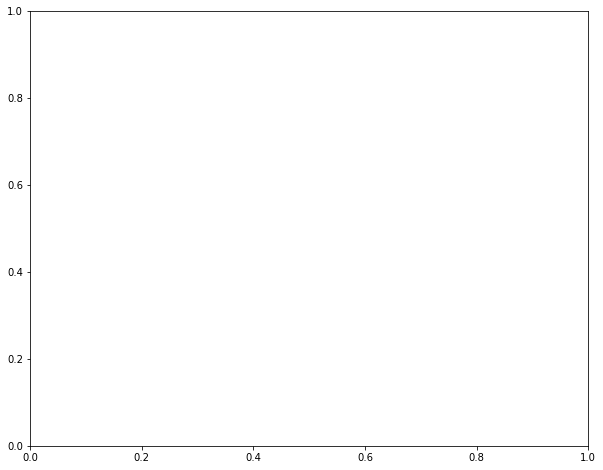

In [2]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(160000)]
muavgsq= [0 for n in range(160000)]

counts=np.zeros([40,999])
bins=np.zeros([40,1000])
area=np.zeros(40)

# print(mu)
run_num=40
n_bins = np.linspace(1, 100, num=1000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('/Users/agnivaghosh/Downloads/Lensing/magnifications/data/IrtyshIIIc/range/mag*.dat'):
    muavg=0
    print(j,end='\r')
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     nparray=mag['mag']
#     nparray[nparray == 0] = np.nan
    
    mag['mag'][0]=1
    nparray=mag['mag']
    muavg=muavg+nparray
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan

#     m=2.5*np.log10(nparray)
    area[j]=np.sum(muavg)*0.05*0.05*36/60/60
#     k=0
#     for i in range(len(nparray)):
#         if nparray[i]>30:
#             k+=1
# #     counts, bins, what = ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.8,label=filename)
# #     print(bins[3000])
#     counts[j]=k
    
    
    counts[j], bins[j]=np.histogram(nparray,n_bins, density=True)
#     print(len(m))
    
    
    
    
#     counts[j], bins[j], what=ax.hist(nparray, n_bins, density=True, histtype='step',cumulative=False,linewidth=2,alpha=0.1)
    j=j+1

muavg[muavg == 0] = np.nan
muavgsq[muavgsq == 0] = np.nan
muavg=abs(2.5*np.log10(muavg/run_num))
muavgsq=2.5*np.log10(muavgsq/run_num)


# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)

# ax.hist(muavgsum, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Plummers Averaged')
# ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Grale Runs Averaged')
# ax.plot([4,5.25],[0.09,0.009],color="LightGray")
# print(muavgsq)
# print(min(muavg))
# plt.grid(True)
# plt.axis()
# ax.set_title('z=3 single plane')
# ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
# ax.legend(loc='upper right')
# plt.show()
# fig.savefig('z9_ind_runs.png', dpi=300)

In [5]:
bins[1][0]-bins[1][1]

-0.0990990990990992

In [6]:
print(np.sum(nparray))
print(len(mag['mag']))
print(np.count_nonzero(~np.isnan(nparray)))

nan
103041
40131


In [7]:
def phiL(M):
    return 0.4*math.log(10)*phistar*10**(-0.4*(M-Mstar)*(alpha+1))*math.exp(-10**(-0.4*(M-Mstar)))

(-24.0, -14.0, 1e-07, 0.1)

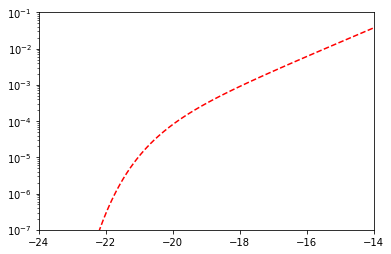

In [8]:
M = np.linspace(-24, -14, num=100)
import math
phistar=10**(-3.88)
Mstar=-20.35
alpha=-1.98
x=np.zeros(len(M))
for i in range(len(M)): 
    x[i]=phiL(M[i])
plt.plot(M,x,'r--')
plt.yscale('log')
plt.axis([-24,-14,10**(-7),0.1])

In [9]:
N=len(counts[1])

In [10]:
omega=np.zeros([40,len(M)])
phi=np.zeros([40,len(M)])
for i in range(40):
    for j in range(len(M)):
        for k in range(N):
            phi[i,j]+=(1/bins[i,k+1])*phiL(M[j]+2.5*np.log10(bins[i,k+1]))*counts[i,k]*0.0990990990990992
meancountIIIc=np.mean(phi,axis=0)
meansqcountIIIc=np.mean(phi**2,axis=0)
sdIIIc=np.sqrt(meansqcountIIIc-meancountIIIc**2)

omega=phi

phi=np.zeros([40,len(M)])
for i in range(40):
    for j in range(len(M)):
        for k in range(N):
            phi[i,j]+=(1/bins370[i,k+1])*phiL(M[j]+2.5*np.log10(bins370[i,k+1]))*counts370[i,k]*0.0990990990990992
#     plt.plot(M,phi[i,:],alpha=0.05,color='tab:orange')
    
meancount370=np.mean(phi,axis=0)
meansqcount370=np.mean(phi**2,axis=0)
sd370=np.sqrt(meansqcount370-meancount370**2)

omega+=phi

phi=np.zeros([40,len(M)])
for i in range(40):
    for j in range(len(M)):
        for k in range(N):
            phi[i,j]+=(1/bins370hff[i,k+1])*phiL(M[j]+2.5*np.log10(bins370hff[i,k+1]))*counts370hff[i,k]*0.0990990990990992
#     plt.plot(M,phi[i,:],alpha=0.05,color='tab:orange')
    
meancount370hff=np.mean(phi,axis=0)
meansqcount370hff=np.mean(phi**2,axis=0)
sd370hff=np.sqrt(meansqcount370hff-meancount370hff**2)

omega+=phi



In [11]:
mean=np.mean(omega,axis=0)
meansq=np.mean(omega**2,axis=0)
sd=np.sqrt(meansq-mean**2)

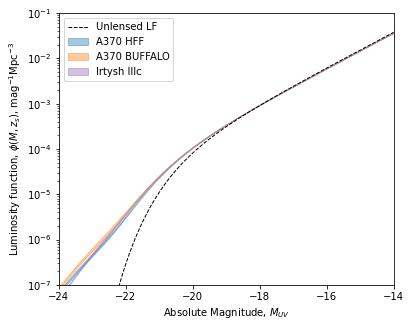

In [28]:
fig, ax = plt.subplots(figsize=(6,5))
factor=1


# # plt.plot(M, meancount370hff+sd370hff,alpha=0.4,linewidth=1,color='tab:blue')
# # plt.plot(M, meancount370hff-sd370hff,alpha=0.4,linewidth=1,color='tab:blue')
plt.fill_between(M, meancount370hff+factor*sd370hff, meancount370hff-factor*sd370hff,alpha=0.4,color='tab:blue',label='A370 HFF')

# plt.plot(M, meancount370+sd370,alpha=0.4,linewidth=1,color='tab:orange')
# # plt.plot(M, meancount370-sd370,alpha=0.4,linewidth=1,color='tab:orange')
plt.fill_between(M, meancount370+factor*sd370, meancount370-factor*sd370,alpha=0.4,color='tab:orange',label='A370 BUFFALO')


# plt.plot(M, meancountIIIc+sdIIIc,alpha=0.4,linewidth=1,color='tab:purple')
# plt.plot(M, meancountIIIc-sdIIIc,alpha=0.4,linewidth=1,color='tab:purple')
plt.fill_between(M, (meancountIIIc+factor*sdIIIc), (meancountIIIc-factor*sdIIIc),alpha=0.4,color='tab:purple',label='Irtysh IIIc')


# plt.fill_between(M, (mean+factor*sd)/3, (mean-factor*sd)/3,alpha=0.4,color='tab:red')


    
    
plt.plot(M,x,'--',c='black',linewidth=1,label='Unlensed LF')
plt.yscale('log')
plt.axis([-24,-14,10**(-7),0.1])
# ax.set_title('Irtysh IIIc | z=9.0')
ax.set_xlabel('Absolute Magnitude, $M_{UV}$ ')
ax.set_ylabel('Luminosity function, $\phi(M,z_s)$, mag$^{-1}$Mpc$^{-3}$')
ax.legend(loc='upper left')

plt.show()



fig.savefig('/Users/agnivaghosh/Downloads/Lensing/magnifications/plots/LF.pdf', dpi=300, transparent=True, bbox_inches='tight')

In [148]:
M[15]

-22.484848484848484

In [24]:
sd370[15]/meancount370[15],sd370hff[15]/meancount370hff[15],sdIIIc[15]/meancountIIIc[15]

(0.0783090403267027, 0.052169530970671, 0.03705279558286721)

No handles with labels found to put in legend.


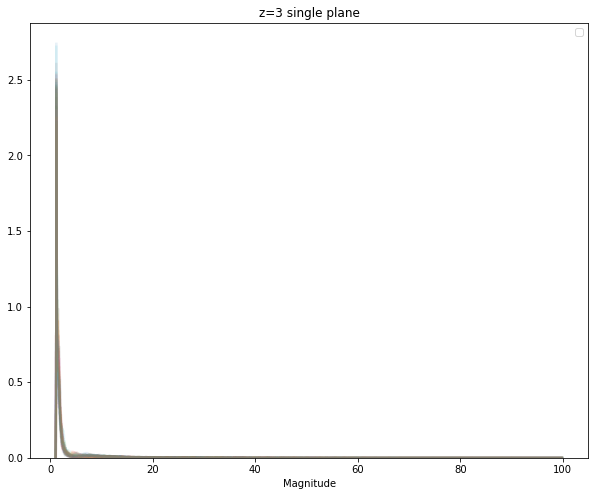

In [3]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(103041)]
muavgsq= [0 for n in range(103041)]

counts370=np.zeros([40,999])
bins370=np.zeros([40,1000])
area370=np.zeros(40)

# print(mu)
run_num=40
n_bins = np.linspace(1, 100, num=1000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('/Users/agnivaghosh/Downloads/Lensing/magnifications/data/A370/buffalo/range_z9/mag*.dat'):
    
    print(j,end='\r')
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     nparray=mag['mag']
#     nparray[nparray == 0] = np.nan
    muavg=0
    mag['mag'][0]=1
    mag[mag['xs'] > 40] = np.nan
    mag[mag['xs'] < -60] = np.nan
    mag[mag['ys'] > 60] = np.nan
    mag[mag['ys'] < -40] = np.nan
    nparray=mag['mag']
#     if nparray.any()>0: 
    muavg=muavg+nparray
#     muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
#     m=2.5*np.log10(nparray)
#     print(np.sum(muavg))
    area370[j]=np.sum(muavg)*0.5*0.5/60/60
#     print(area370[j])
    
    
#     print(len(m))
    
    
    
    
    counts370[j], bins370[j], what=ax.hist(nparray, n_bins, density=True, histtype='step',cumulative=False,linewidth=2,alpha=0.1)
    j=j+1

# muavg[muavg == 0] = np.nan
# muavgsq[muavgsq == 0] = np.nan
# muavg=abs(2.5*np.log10(muavg/run_num))
# muavgsq=2.5*np.log10(muavgsq/run_num)

# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)

# ax.hist(muavgsum, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Plummers Averaged')
# ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Grale Runs Averaged')
# ax.plot([4,5.25],[0.09,0.009],color="LightGray")
# print(muavgsq)
# print(min(muavg))
# plt.grid(True)
plt.axis()
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
# fig.savefig('z9_ind_runs.png', dpi=300)

No handles with labels found to put in legend.


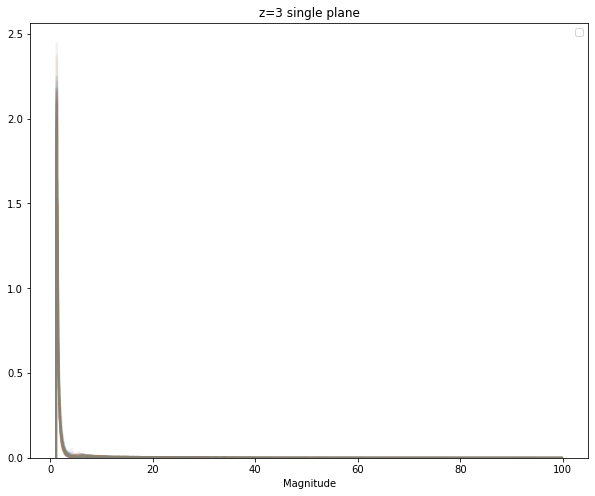

In [4]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(103041)]
muavgsq= [0 for n in range(103041)]

counts370hff=np.zeros([40,999])
bins370hff=np.zeros([40,1000])


# print(mu)
run_num=40
n_bins = np.linspace(1, 100, num=1000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('/Users/agnivaghosh/Downloads/Lensing/magnifications/data/A370/hff/range_z9/mag*.dat'):
    
    print(j,end='\r')
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     nparray=mag['mag']
#     nparray[nparray == 0] = np.nan
    
    mag['mag'][0]=1
    mag[mag['xs'] > 40] = np.nan
    mag[mag['xs'] < -60] = np.nan
    mag[mag['ys'] > 60] = np.nan
    mag[mag['ys'] < -40] = np.nan
    nparray=mag['mag']
    muavg=muavg+nparray
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
    
    
#     print(len(m))
    
    
    
    
    counts370hff[j], bins370hff[j], what=ax.hist(nparray, n_bins, density=True, histtype='step',cumulative=False,linewidth=2,alpha=0.1)
    j=j+1

# muavg[muavg == 0] = np.nan
# muavgsq[muavgsq == 0] = np.nan
# muavg=abs(2.5*np.log10(muavg/run_num))
# muavgsq=2.5*np.log10(muavgsq/run_num)

# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)

# ax.hist(muavgsum, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Plummers Averaged')
# ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Grale Runs Averaged')
# ax.plot([4,5.25],[0.09,0.009],color="LightGray")
# print(muavgsq)
# print(min(muavg))
# plt.grid(True)
plt.axis()
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
# fig.savefig('z9_ind_runs.png', dpi=300)

In [108]:
np.sum(muavg)/103041

5.106736587597505

In [109]:
print(np.mean(area370))

nan
